In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import requests 
file_url="https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz"
    
r = requests.get(file_url, stream = True) 

with open("/content/drive/MyDrive/TKC/cifar-100-python.tar.gz", "wb") as file: 
    for block in r.iter_content(chunk_size = 1024): 
        if block: 
            file.write(block)

In [1]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2

In [ ]:
%cd /content/drive/MyDrive/TKC

/content/drive/MyDrive/TKC


**DOWNLOAD FILE**

In [ ]:
import tarfile
fname = '/content/drive/MyDrive/TKC/cifar-100-python.tar.gz'
if fname.endswith("tar.gz"):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()
elif fname.endswith("tar"):
    tar = tarfile.open(fname, "r:")
    tar.extractall()
    tar.close()

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [5]:
file = '/content/drive/MyDrive/TKC/cifar-100-python/train'
data_batch_1 = unpickle(file)

In [6]:
meta_file = '/content/drive/MyDrive/TKC/cifar-100-python/meta'
meta_data = unpickle(meta_file)

In [7]:
X_train = data_batch_1['data']

In [ ]:
X_train.shape

(50000, 3072)

In [8]:
# Reshape the whole image data
X_train = X_train.reshape(len(X_train),3,32,32)
# Transpose the whole data
X_train = X_train.transpose(0,2,3,1)

Text(0.5, 1.0, 'Coarse Label Name:household_electrical_devices \n Fine Label Name:sea')

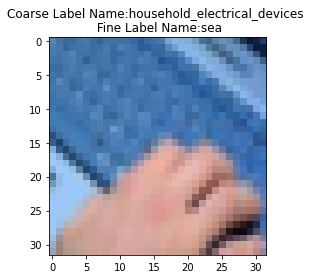

In [15]:
# Python 3 program to visualize 4th image
import matplotlib.pyplot as plt
# take 4th image from training data
image = data_batch_1['data'][10]
# reshape and transpose the image
image = image.reshape(3,32,32).transpose(1,2,0)
# take coarse and fine labels of the image 
c_label = data_batch_1['coarse_labels'][10]
f_label = data_batch_1['fine_labels'][19]
# take coarse and fine label names of the image
coarse_name = meta_data['coarse_label_names'][c_label]
fine_name = meta_data['fine_label_names'][f_label]
# dispaly the image
plt.imshow(image)
plt.title("Coarse Label Name:{} \n Fine Label Name:{}"
          .format(coarse_name, fine_name))

In [10]:
from PIL import Image
im = Image.fromarray(image)
im.save("keyboard.jpeg")

In [11]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

**1. Arithmetic**

In [17]:
args = {
	"image": "keyboard.jpeg"
}

In [ ]:
added = cv2.add(np.uint8([200]), np.uint8([100]))
subtracted = cv2.subtract(np.uint8([50]), np.uint8([100]))
print("max of 255: {}".format(added))
print("min of 0: {}".format(subtracted))

max of 255: [[255]]
min of 0: [[0]]


In [ ]:
added = np.uint8([200]) + np.uint8([100])
subtracted = np.uint8([50]) - np.uint8([100])
print("wrap around: {}".format(added))
print("wrap around: {}".format(subtracted))

wrap around: [44]
wrap around: [206]


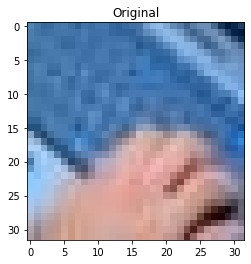

In [18]:
image = cv2.imread(args["image"])
plt_imshow("Original", image)

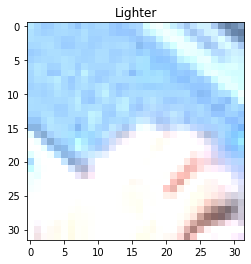

In [ ]:
M = np.ones(image.shape, dtype="uint8") * 100
added = cv2.add(image, M)
plt_imshow("Lighter", added)

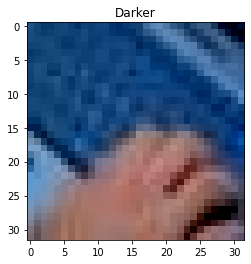

In [ ]:
M = np.ones(image.shape, dtype="uint8") * 50
subtracted = cv2.subtract(image, M)
plt_imshow("Darker", subtracted)

**2. Cropping**

In [ ]:
I = np.arange(0, 25)
I

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [ ]:
I = I.reshape((5, 5))
I

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
I[0:3, 0:2]

array([[ 0,  1],
       [ 5,  6],
       [10, 11]])

In [ ]:
I[3:5, 1:5]

array([[16, 17, 18, 19],
       [21, 22, 23, 24]])

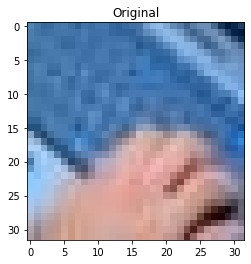

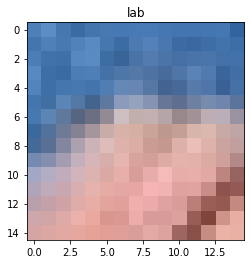

In [19]:


# load the input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# cropping an image with OpenCV is accomplished via simple NumPy
# array slices in startY:endY, startX:endX order -- here we are
# cropping the monitor from the image (these coordinates were
# determined using photo editing software such as Photoshop,
# GIMP, Paint, etc.)
# Dimension lab.jpeg = 720x1600
lab = image[10:25, 10:25]
plt_imshow("lab", lab)



**3. Drawing**

In [20]:
# initialize our canvas as a 300x300 pixel image with 3 channels
# (Red, Green, and Blue) with a black background
canvas = np.zeros((300, 300, 3), dtype="uint8")

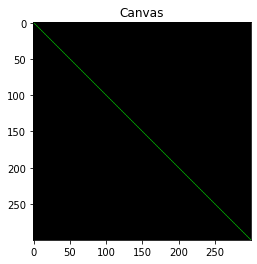

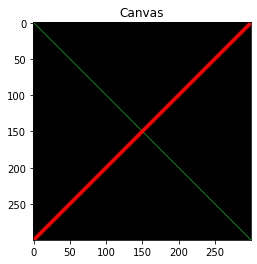

In [21]:
# draw a green line from the top-left corner of our canvas to the
# bottom-right
green = (0, 255, 0)
cv2.line(canvas, (0, 0), (300, 300), green)
plt_imshow("Canvas", canvas)

# draw a 3 pixel thick red line from the top-right corner to the
# bottom-left
red = (0, 0, 255)
cv2.line(canvas, (300, 0), (0, 300), red, 3)
plt_imshow("Canvas", canvas)

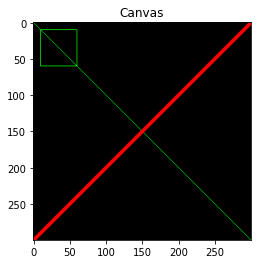

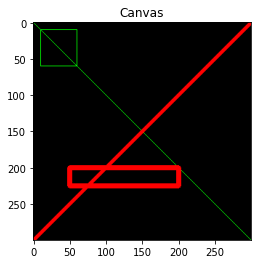

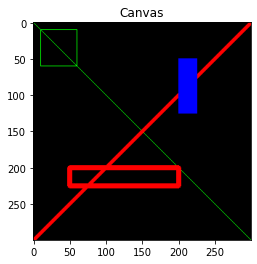

In [22]:
# draw a green 50x50 pixel square, starting at 10x10 and ending at 60x60
cv2.rectangle(canvas, (10, 10), (60, 60), green)
plt_imshow("Canvas", canvas)

# draw another rectangle, this one red with 5 pixel thickness
cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)
plt_imshow("Canvas", canvas)

# draw a final rectangle (blue and filled in )
blue = (255, 0, 0)
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)
plt_imshow("Canvas", canvas)

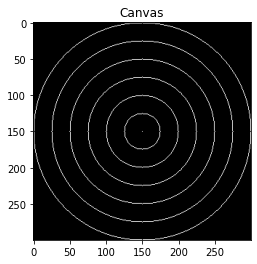

In [23]:
# re-initialize our canvas as an empty array, then compute the
# center (x, y)-coordinates of the canvas
canvas = np.zeros((300, 300, 3), dtype="uint8")
(centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)
white = (255, 255, 255)

# loop over increasing radii, from 25 pixels to 150 pixels in 25
# pixel increments
for r in range(0, 175, 25):
	# draw a white circle with the current radius size
	cv2.circle(canvas, (centerX, centerY), r, white)

# show our work of art
plt_imshow("Canvas", canvas)

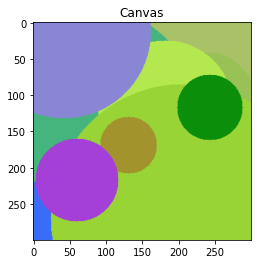

In [24]:
# re-initialize our canvas once again
canvas = np.zeros((300, 300, 3), dtype="uint8")

# let's draw 25 random circles
for i in range(0, 25):
	# randomly generate a radius size between 5 and 200, generate a
	# random color, and then pick a random point on our canvas where
	# the circle will be drawn
	radius = np.random.randint(5, high=200)
	color = np.random.randint(0, high=256, size=(3,)).tolist()
	pt = np.random.randint(0, high=300, size=(2,))

	# draw our random circle on the canvas
	cv2.circle(canvas, tuple(pt), radius, color, -1)

# display our masterpiece to our screen
plt_imshow("Canvas", canvas)

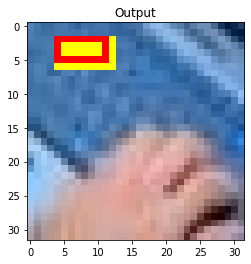

In [25]:


cv2.rectangle(image, (4, 2), (12, 6), (0, 255, 255), -1)
cv2.rectangle(image, (4, 2), (11, 5), (0, 0, 255), 1)

# show the output image
plt_imshow("Output", image)



**4. Flipping**

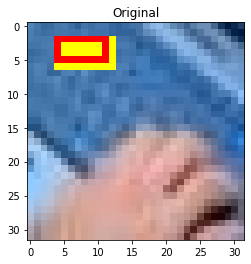

[INFO] flipping image horizontally...


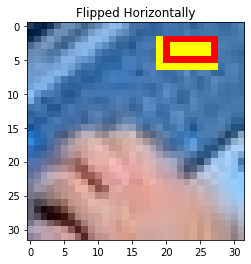

In [ ]:
plt_imshow("Original", image)

# flip the image horizontally
print("[INFO] flipping image horizontally...")
flipped = cv2.flip(image, 1)
plt_imshow("Flipped Horizontally", flipped)

[INFO] flipping image vertically...


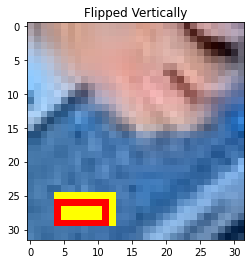

In [26]:
# flip the image vertically
flipped = cv2.flip(image, 0)
print("[INFO] flipping image vertically...")
plt_imshow("Flipped Vertically", flipped)

[INFO] flipping image horizontally and vertically...


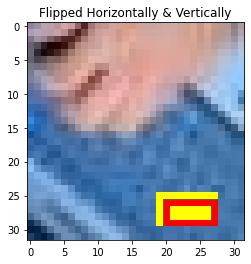

In [27]:


# flip the image along both axes
flipped = cv2.flip(image, -1)
print("[INFO] flipping image horizontally and vertically...")
plt_imshow("Flipped Horizontally & Vertically", flipped)



**Masking**

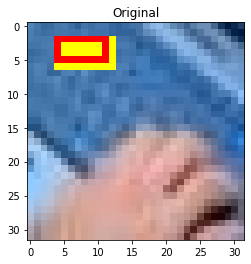

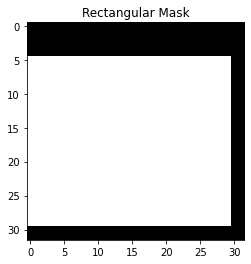

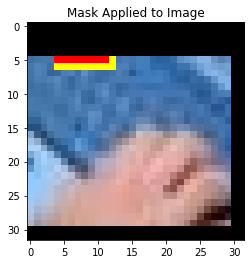

In [30]:
plt_imshow("Original", image)

# a mask is the same size as our image, but has only two pixel
# values, 0 and 255 -- pixels with a value of 0 (background) are
# ignored in the original image while mask pixels with a value of
# 255 (foreground) are allowed to be kept
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (0, 29), (29, 5), 255, -1)
plt_imshow("Rectangular Mask", mask)

# apply our mask -- notice how only the person in the image is
# cropped out
masked = cv2.bitwise_and(image, image, mask=mask)
plt_imshow("Mask Applied to Image", masked)

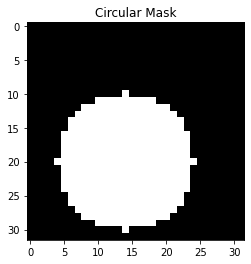

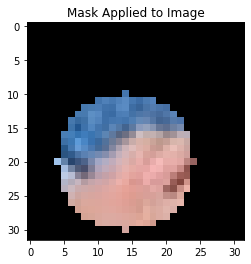

In [31]:
# now, let's make a circular mask with a radius of 100 pixels and
# apply the mask again
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.circle(mask, (14, 20), 10, 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)

# show the output images
plt_imshow("Circular Mask", mask)
plt_imshow("Mask Applied to Image", masked)

# Pixel

In [ ]:
%cd /content/drive/MyDrive/Semester 7/TKC

/content/drive/MyDrive/Semester 7/TKC


In [ ]:
args = {
	"image": "keyboard.jpeg"
}

In [ ]:
# import the necessary packages
from matplotlib import pyplot as plt
import argparse
import cv2

In [ ]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

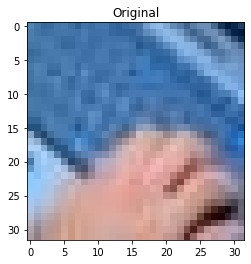

In [ ]:
image = cv2.imread(args["image"])
(h, w) = image.shape[:2]
plt_imshow("Original", image)

In [ ]:
# images are simply NumPy arrays -- with the origin (0, 0) located at
# the top-left of the image
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

# access the pixel located at x=50, y=20
(b, g, r) = image[10, 30]
print("Pixel at (30, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

# update the pixel at (50, 20) and set it to red
image[10, 30] = (0, 0, 255)
(b, g, r) = image[10, 30]
print("Pixel at (30, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

Pixel at (0, 0) - Red: 82, Green: 132, Blue: 181
Pixel at (30, 20) - Red: 104, Green: 153, Blue: 211
Pixel at (30, 20) - Red: 255, Green: 0, Blue: 0


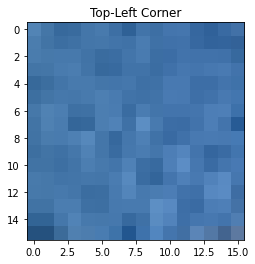

In [ ]:
(cX, cY) = (w // 2, h // 2)

# top-left corner of the image
tl = image[0:cY, 0:cX]
plt_imshow("Top-Left Corner", tl)

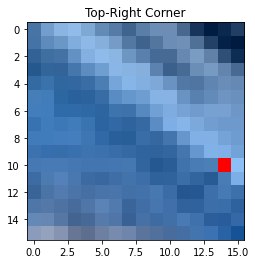

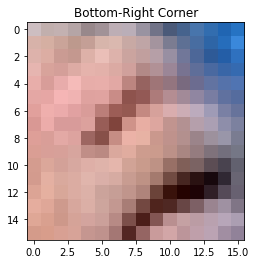

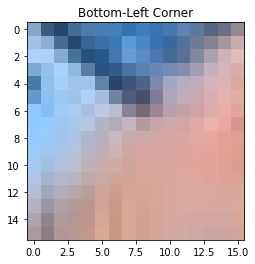

In [ ]:
tr = image[0:cY, cX:w]
br = image[cY:h, cX:w]
bl = image[cY:h, 0:cX]
plt_imshow("Top-Right Corner", tr)
plt_imshow("Bottom-Right Corner", br)
plt_imshow("Bottom-Left Corner", bl)

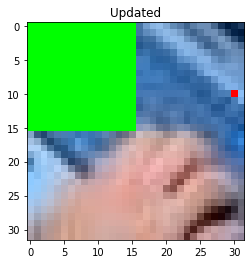

In [ ]:
# set the top-left corner of the original image to be green
image[0:cY, 0:cX] = (0, 255, 0)

# Show our updated image
plt_imshow("Updated", image)

# Read Write Image

In [ ]:
# import the necessary packages
from matplotlib import pyplot as plt
import argparse
import cv2

In [ ]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [ ]:
# load the image from disk via "cv2.imread" and then grab the spatial
# dimensions, including width, height, and number of channels
image = cv2.imread(args["image"])
(h, w, c) = image.shape[:3]

# display the image width, height, and number of channels
print("width: {} pixels".format(image.shape[1]))
print("height: {}  pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))

width: 32 pixels
height: 32  pixels
channels: 3


# Resize

In [ ]:
import matplotlib.pyplot as plt
import argparse
import imutils
import cv2

In [ ]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

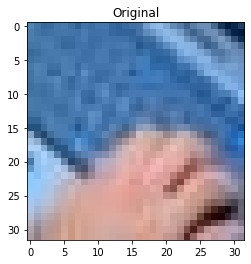

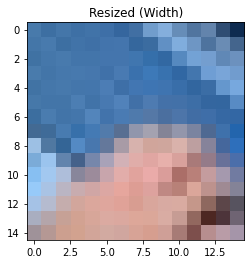

In [ ]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

r = 15.0 / image.shape[1]
dim = (15, int(image.shape[0] * r))

# perform the actual resizing of the image
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Width)", resized)

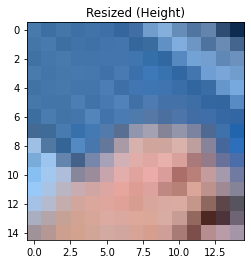

In [ ]:
r = 15.0 / image.shape[0]
dim = (int(image.shape[1] * r), 15)

# perform the resizing
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Height)", resized)

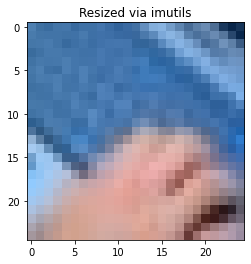

In [ ]:
resized = imutils.resize(image, width=25)
plt_imshow("Resized via imutils", resized)

[INFO] cv2.INTER_NEAREST


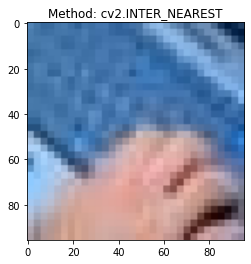

[INFO] cv2.INTER_LINEAR


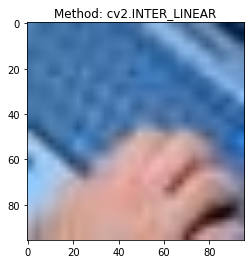

[INFO] cv2.INTER_AREA


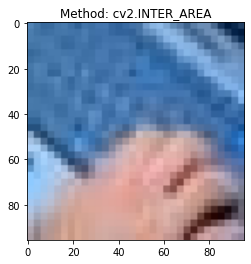

[INFO] cv2.INTER_CUBIC


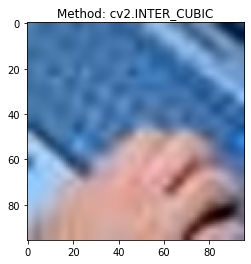

[INFO] cv2.INTER_LANCZOS4


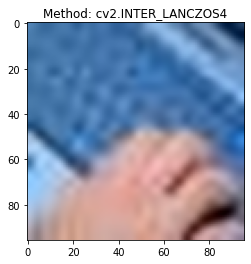

In [ ]:
# construct the list of interpolation methods in OpenCV
methods = [
	("cv2.INTER_NEAREST", cv2.INTER_NEAREST),
	("cv2.INTER_LINEAR", cv2.INTER_LINEAR),
	("cv2.INTER_AREA", cv2.INTER_AREA),
	("cv2.INTER_CUBIC", cv2.INTER_CUBIC),
	("cv2.INTER_LANCZOS4", cv2.INTER_LANCZOS4)]

# loop over the interpolation methods
for (name, method) in methods:
	# increase the size of the image by 3x using the current interpolation method
	print("[INFO] {}".format(name))
	resized = imutils.resize(image, width=image.shape[1] * 3,
		inter=method)
	plt_imshow("Method: {}".format(name), resized)

# Rotate

In [ ]:
# import the necessary packages
import matplotlib.pyplot as plt
import argparse
import imutils
import cv2

In [ ]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

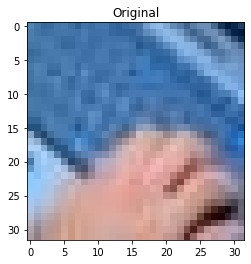

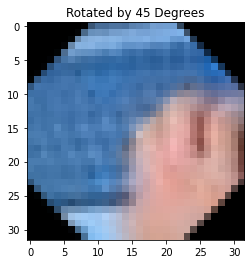

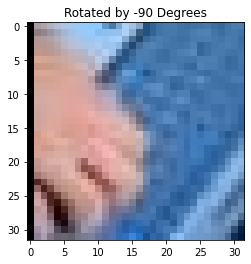

In [ ]:
# load the image and show it
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# grab the dimensions of the image and calculate the center of the image
(h, w) = image.shape[:2]
(cX, cY) = (w // 2, h // 2)

# rotate our image by 45 degrees around the center of the image
M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by 45 Degrees", rotated)

# rotate our image by -90 degrees around the image
M = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by -90 Degrees", rotated)

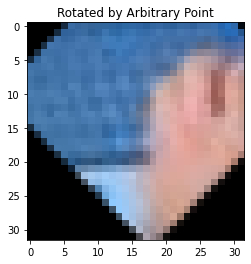

In [ ]:
# rotate image
M = cv2.getRotationMatrix2D((10, 10), 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by Arbitrary Point", rotated)

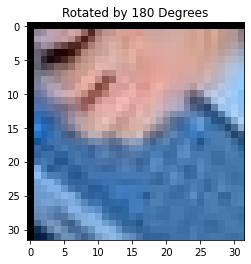

In [ ]:
# use imutil rotate 180
rotated = imutils.rotate(image, 180)
plt_imshow("Rotated by 180 Degrees", rotated)

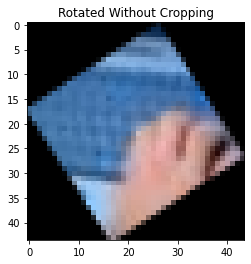

In [ ]:
rotated = imutils.rotate_bound(image, -33)
plt_imshow("Rotated Without Cropping", rotated)

# Split Merge

In [ ]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2

In [ ]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

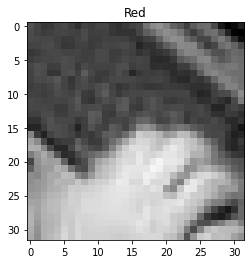

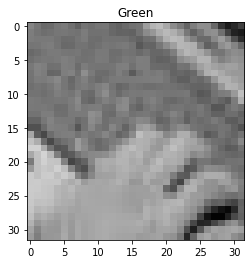

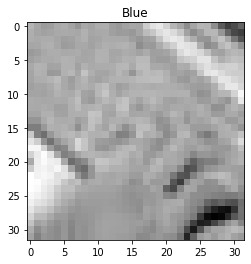

In [ ]:
image = cv2.imread(args["image"])
(B, G, R) = cv2.split(image)

# show each channel individually
plt_imshow("Red", R)
plt_imshow("Green", G)
plt_imshow("Blue", B)

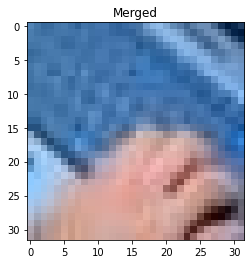

In [ ]:
merged = cv2.merge([B, G, R])
plt_imshow("Merged", merged)

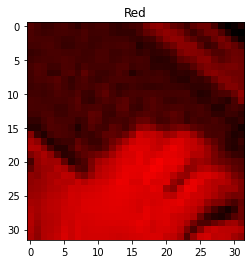

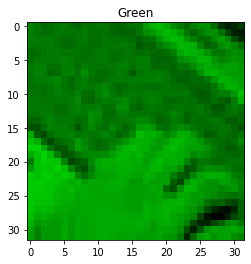

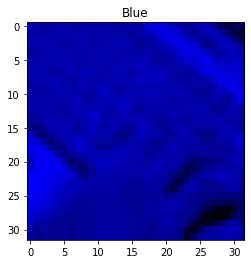

In [ ]:
# visualize each channel in color
zeros = np.zeros(image.shape[:2], dtype="uint8")
plt_imshow("Red", cv2.merge([zeros, zeros, R]))
plt_imshow("Green", cv2.merge([zeros, G, zeros]))
plt_imshow("Blue", cv2.merge([B, zeros, zeros]))

# Translate

In [ ]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import argparse
import imutils
import cv2

In [ ]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

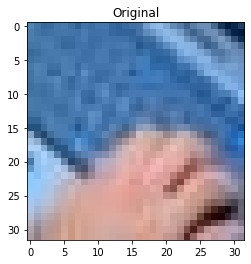

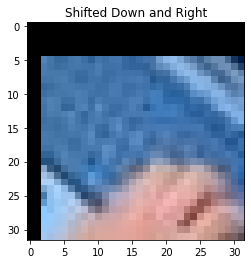

In [ ]:
# load the image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# shift the image 2 pixels to the right and 5 pixels down
M = np.float32([[1, 0, 2], [0, 1, 5]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt_imshow("Shifted Down and Right", shifted)

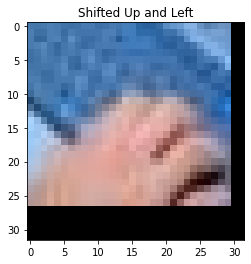

In [ ]:
M = np.float32([[1, 0, -2], [0, 1, -5]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt_imshow("Shifted Up and Left", shifted)

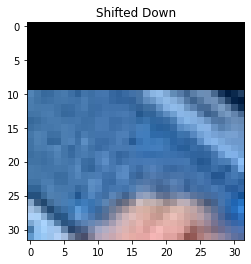

In [ ]:
shifted = imutils.translate(image, 0, 10)
plt_imshow("Shifted Down", shifted)